In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.optimize import curve_fit
from scipy import odr
import glob
import os

In [9]:
X1 = np.array([0.024,0.025,0.026,0.0275,0.0285,0.029,0.0305,0.031,0.033,0.0345,0.0355,0.0365,0.0375,0.038,0.039,0.0395,0.042,0.0425,0.0435,0.0455])
X2 = np.array([0.0235,0.0255,0.0275,0.028,0.0285,0.0305,0.031,0.032,0.0325,0.034,0.0355,0.037,0.038,0.038,0.0395,0.0405,0.041,0.042,0.0425,0.044,0.048,0.05,0.0505,0.0525])
X3 = np.array([0.0235,0.0245,0.026,0.027,0.028,0.0295,0.031,0.032,0.0325,0.034,0.035,0.0355,0.038,0.038,0.039,0.0395])
X4 = np.array([0.0285,0.0295,0.031,0.0315,0.0325,0.0335,0.034,0.0355,0.037,0.0385,0.0395,0.0405,0.0415,0.0425,0.0435,0.0445,0.045,0.046,0.047,0.048,0.0495,0.05,0.051])
X5 = np.array([0.0185,0.0215,0.0225,0.024,0.025,0.0265,0.0275,0.0285,0.03,0.0315,0.0325,0.034,0.0345,0.035,0.037,0.0375,0.0385])
X6 = np.array([0.024,0.0255,0.0275,0.0275,0.0295,0.0305,0.031,0.032,0.033,0.035,0.0365,0.038,0.038,0.039,0.0415,0.0415,0.0425,0.043,0.0445,0.045])
X7 = np.array([0.0295,0.0305,0.032,0.0325,0.0335,0.035,0.036,0.037,0.0375,0.039,0.0405,0.041,0.0415,0.043,0.044,0.0445,0.0455,0.0465,0.0475,0.0485,0.0495,0.0495,0.051,0.052,0.054,0.0555,0.057,0.059,0.06])

In [10]:
hz1 = np.array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320])
hz2 = np.array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,320,340,360,380,400])
hz2_5 = np.array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270])
hz5 = np.array([160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380])
hz10 = np.array([90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240,250])
hz15 = np.array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320])
hz20 = np.array([170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,420,440,460,480,500])

Surface Tension of surfacant solution of 4.54 g/L 21.480656501134842 +- 6.9159617085346 mN/M
Surface Tension of surfacant solution of 9.1 g/L 15.390170977468946 +- 5.1196346879975545 mN/M
Surface Tension of surfacant solution of 11.36 g/L 15.305657266769334 +- 5.1009046903265 mN/M
Surface Tension of surfacant solution of 22.72 g/L 56.4595407653888 +- 12.638105777604714 mN/M
Surface Tension of surfacant solution of 45.45 g/L 14.888686688873628 +- 4.798091366548524 mN/M
Surface Tension of surfacant solution of 68.18 g/L 17.10870841034753 +- 6.769799966608886 mN/M
Surface Tension of surfacant solution of 90.9 g/L 42.700210166242975 +- 5.661728749372655 mN/M


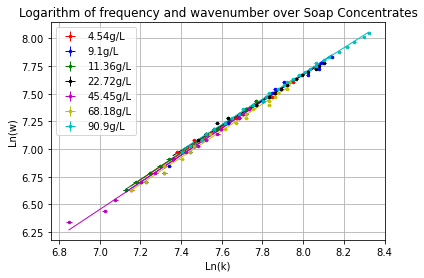

In [11]:
#The amount of soap (surfacant molecules) used in each solution in terms of mL
sols = [4.54,9.1,11.36,22.72,45.45,68.18,90.9]
#The densities of each respective solution in g/L
dens = [998.69,997.65,997.07,994.29,989.1,984.35,980]

hzs = [hz1,hz2,hz2_5,hz5,hz10,hz15,hz20]
X = [X1,X2,X3,X4,X5,X6,X7]
cols = ['r','b','g','k','m','y','c']


#plt.figure(figsize = (20,11))
plt.grid()

for hzs, X, sols,c,p in zip(hzs, X, sols, cols,dens):
    #Laser wavelength, distance of the 0th order image above water, and the distance between the screen and laser
    laz = 632.8e-9
    x = 0.0492
    y = 0.4838
    theta = np.arcsin( x / np.sqrt( (x**2)+(y**2))  )
    l = 4.838
    x1 = 1*np.tan(theta)
    k = []
    for i in X:
        h = x1 + i 
        j = 2*i
        m = ( np.pi*h*j ) / ( laz*((h**2)+l**2) )
        k.append(m)
    #logs of the values for the lnk lnw relation
    lnk = np.log(k)
    w = 2 * hzs * np.pi
    lnw = np.log(w)
    
    #all code below follows a propogation of errors following pm the smallest decimal of each data point i.e 0.0005
    xerr = yerr = 0.0005
    dfdx =  y / ( (x**2) + (y**2) )
    dfdy = -( x / ( (x**2) + (y**2) ))
    theterr = np.sqrt( (dfdy**2) * (yerr**2) + (dfdx**2) * (xerr**2) )
    
    Xx1 = l*np.tan(theta)
    lerr = 0.0005
    dfdl = np.tan(theta)
    dfdt = 1 / (np.cos(theta)**2)
    Xerr = np.sqrt ( (dfdl**2) * (lerr**2) + (dfdt**2) * (theterr**2) )
    
    lnkerr = []
    dfdl = - ( (2*l) / ( (h**2) + (l**2)) )
    dfdh = - ( (h**2) - (l**2) ) / ( (h**3) + h*(l**2) )
    
    for i in X:
        d = 2*i
        derr = 0.0005
        h = Xx1 + d/2
        dhdx = 1
        dhdd = 1/2
        herr = np.sqrt( (dhdx**2) * (Xerr**2) + (dhdd**2) * (derr**2) )
        dfdd = 1/d
        
        lnkerrv = np.sqrt( (dfdh**2) * (herr**2) + (dfdd**2) * (derr**2) + (dfdl**2) * (lerr**2) )
        lnkerr.append(lnkerrv)
        
    lnwerr = []
    for i in hzs:
        lnwerrv = np.sqrt( ( (1/i)**2) * ( (0.5)**2) )
        lnwerr.append(lnwerrv)
    
    #Errors of lnk and lnw   
    plt.errorbar(lnk, lnw, lnwerr, lnkerr, '.', markersize = 5, linewidth = 1, color = c, label = str(sols)+"g/L")
    plt.legend()
    
    def func(p, x):
        m, c = p
        return m*x + c 
    
    data = odr.RealData( lnk, lnw, sx = lnkerr, sy = lnwerr)
    lin = odr.Model(func)
    odr1 = odr.ODR(data, lin, beta0 = [1.5, -5])
    out = odr1.run()
    
    errsurf = np.sqrt(((2*p*np.exp( 2*( out.beta[1]) ) )**2) * ( (out.sd_beta[1])**2) )
    
    y = out.beta[0] * lnk + out.beta[1]
    plt.plot(lnk,y,linewidth=1,color=c)
    plt.title('Logarithm of frequency and wavenumber over Soap Concentrates')
    plt.xlabel('Ln(k)')
    plt.ylabel('Ln(w)')
    
    
    
    surf = p*np.exp(2*out.beta[1])
    print('Surface Tension of surfacant solution of', str(sols), 'g/L',surf,'+-',errsurf, 'mN/M')
    
plt.savefig('Surface tension soap')

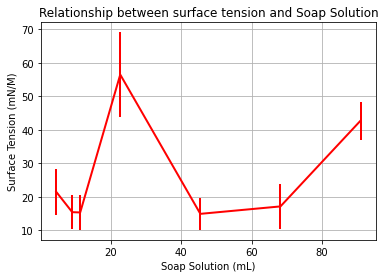

In [12]:
surface = [21.480656501134842 ,15.390170977468946,15.305657266769334,56.4595407653888 ,14.888686688873628 ,  17.10870841034753, 42.700210166242975]
surfacerr = [6.9159617085346 ,5.1196346879975545 ,5.1009046903265 ,12.638105777604714 ,4.798091366548524,6.769799966608886,5.661728749372655   ]
sols = [4.54,9.1,11.36,22.72,45.45,68.18,90.9]

#plt.figure(figsize = (20,11))
plt.grid()
plt.errorbar(sols, surface, surfacerr, markersize = 5, linewidth = 2, color= 'r')
plt.title('Relationship between surface tension and Soap Solution')
plt.xlabel('Soap Solution (mL)')
plt.ylabel('Surface Tension (mN/M)')
plt.savefig('surfaceSoap')